In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning)
import pandas as pd
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)
from prophet import Prophet
from neuralprophet import NeuralProphet
from neuralprophet import NeuralProphet, set_log_level
set_log_level("ERROR")
from matplotlib import pyplot as plt
from prophet.plot import plot_plotly, plot_components_plotly
import plotly.express as px
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
from prophet.plot import plot_cross_validation_metric
import time
import numpy as np

In [2]:
m = NeuralProphet(n_changepoints=10,
                  n_lags=10,
                  changepoints_range=0.75,
                  learning_rate = 1.1)

df = pd.read_csv('../forecasting/historical_data/cable_retention_weekly.csv', parse_dates=['ds'])
# df.loc[(df['ds'] > '2020-02-01') & (df['ds'] < '2020-12-01'), 'y'] = None
# create a test holdout set:
df_train_val, df_test = m.split_df(df=df, freq="W", valid_p=0.2)
# create a validation holdout set:
df_train, df_val = m.split_df(df=df_train_val, freq="W", valid_p=0.2)

In [3]:
# fit a model on training data and evaluate on validation set.
metrics_train1 = m.fit(df=df_train, freq="W")
metrics_val = m.test(df=df_val)


In [4]:
# refit model on training and validation data and evaluate on test set.
m = NeuralProphet(n_changepoints=10,
                  n_lags=10,
                  changepoints_range=0.75,
                  learning_rate = 1.1)
metrics_train2 = m.fit(df=df_train_val, freq="W")
metrics_test = m.test(df=df_test)

In [5]:
metrics_train1["split"]  = "train1"
metrics_train2["split"]  = "train2"
metrics_val["split"] = "validate"
metrics_test["split"] = "test"
metrics_train1.tail(1).append([metrics_train2.tail(1), metrics_val, metrics_test]).drop(columns=['RegLoss'])

,SmoothL1Loss,MAE,RMSE,split
513,0.006336,131.910863,169.772996,train1
449,0.006992,136.199170,177.046677,train2
0,0.039725,368.498840,436.330231,validate
0,0.026962,296.483368,357.149200,test


In [6]:
METRICS = ['SmoothL1Loss', 'MAE', 'RMSE']
params = {'n_changepoints': 10, 'n_lags': 10, 'changepoints_range': 0.75, 'learning_rate': 1.1}

df = pd.read_csv('../forecasting/historical_data/cable_retention_weekly.csv', parse_dates=['ds'])
folds = NeuralProphet(**params).crossvalidation_split_df(df, freq="W", k=5, fold_pct=0.20, fold_overlap_pct=0.5)

In [7]:
metrics_train = pd.DataFrame(columns=METRICS)
metrics_test = pd.DataFrame(columns=METRICS)

for df_train, df_test in folds:
    m = NeuralProphet(**params)
    train = m.fit(df=df_train, freq="W")
    test = m.test(df=df_test)
    metrics_train = metrics_train.append(train[METRICS].iloc[-1])
    metrics_test = metrics_test.append(test[METRICS].iloc[-1])

In [8]:
metrics_test.describe()

,SmoothL1Loss,MAE,RMSE
count,5.000000,5.000000,5.000000
unique,5.000000,5.000000,5.000000
top,0.157801,783.043213,908.453186
freq,1.000000,1.000000,1.000000


In [9]:
metrics_val.describe()

,SmoothL1Loss,MAE,RMSE
count,1.000000,1.00000,1.000000
mean,0.039725,368.49884,436.330231
std,NaN,NaN,NaN
min,0.039725,368.49884,436.330231
25%,0.039725,368.49884,436.330231
50%,0.039725,368.49884,436.330231
75%,0.039725,368.49884,436.330231
max,0.039725,368.49884,436.330231


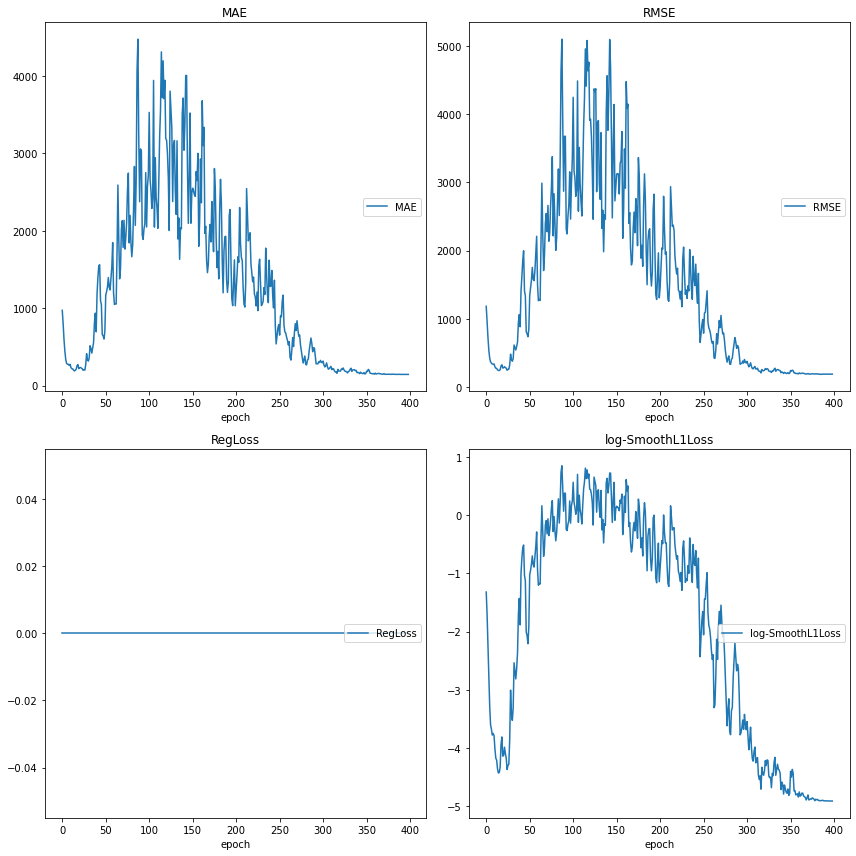

MAE
	MAE              	 (min:  144.297, max: 4473.094, cur:  144.621)
RMSE
	RMSE             	 (min:  184.608, max: 5100.332, cur:  189.464)
RegLoss
	RegLoss          	 (min:    0.000, max:    0.000, cur:    0.000)
log-SmoothL1Loss
	log-SmoothL1Loss 	 (min:   -4.911, max:    0.846, cur:   -4.911)


In [10]:
m = NeuralProphet(n_changepoints=10,
                  n_lags=10,
                  changepoints_range=0.75,
                  learning_rate = 1.1
                 )
metrics = m.fit(df,progress='plot-all')

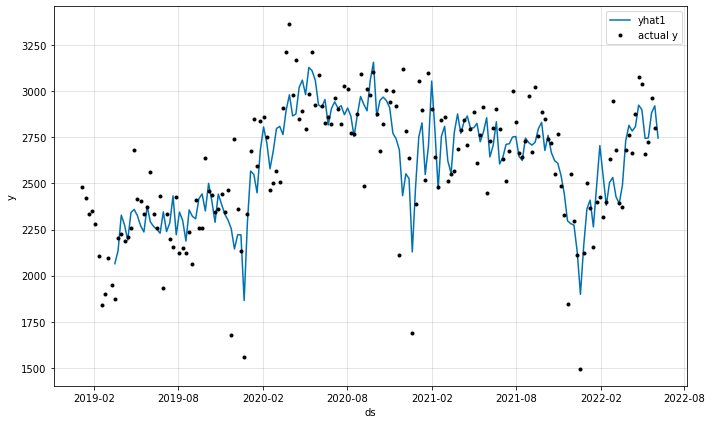

In [11]:
future = m.make_future_dataframe(df, n_historic_predictions=True)
forecast = m.predict(future)
fig = m.plot(forecast)

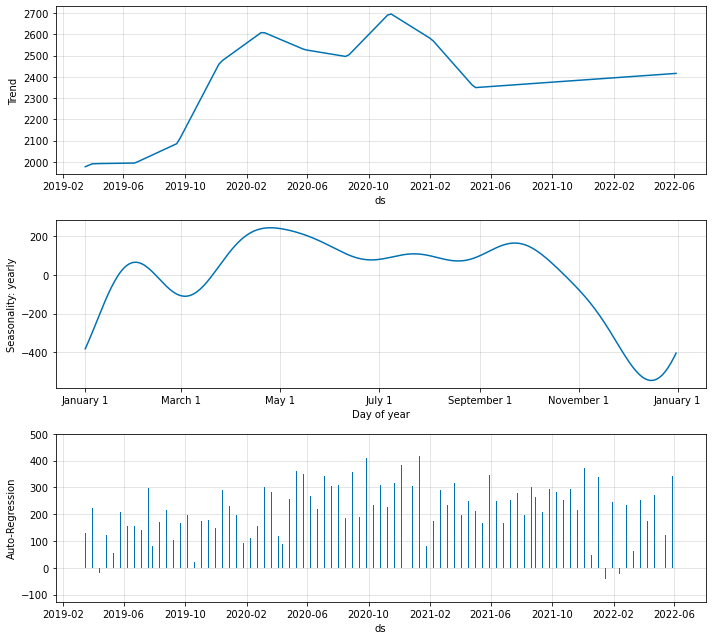

In [12]:
fig_comp = m.plot_components(forecast)


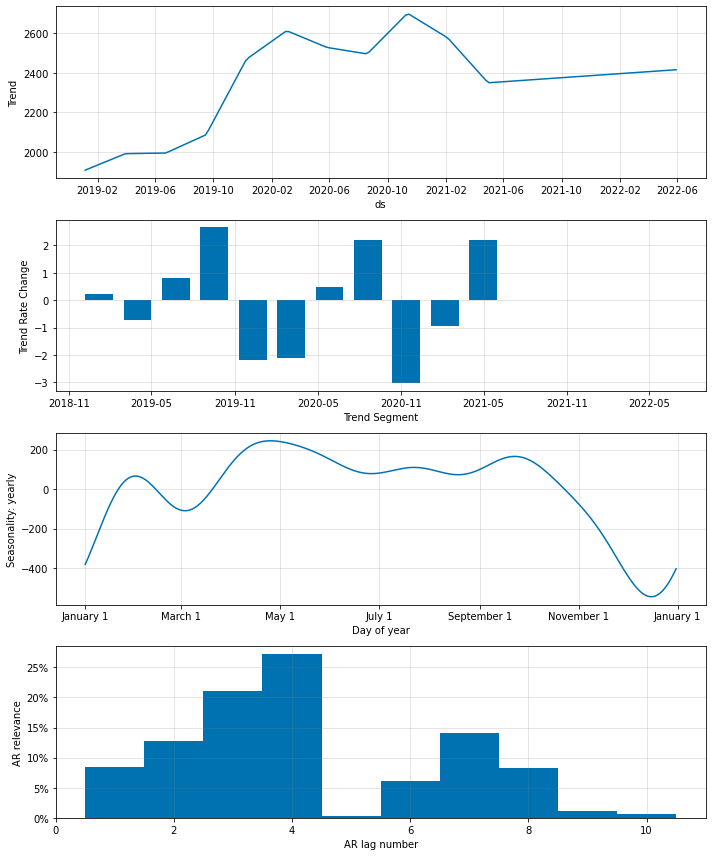

In [13]:
fig_param = m.plot_parameters()

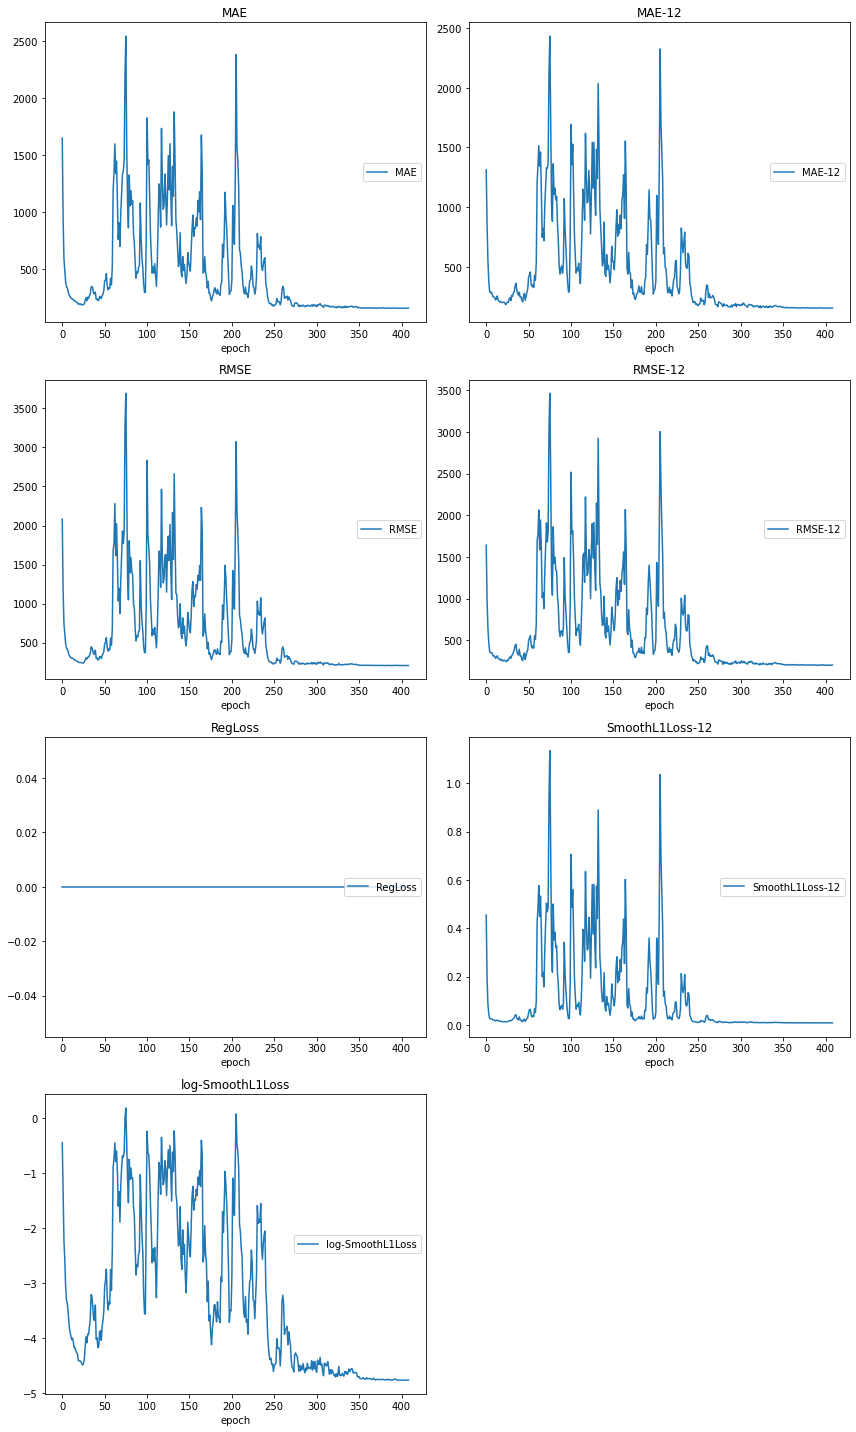

MAE
	MAE              	 (min:  152.936, max: 2548.236, cur:  154.068)
MAE-12
	MAE-12           	 (min:  151.787, max: 2433.533, cur:  153.931)
RMSE
	RMSE             	 (min:  206.406, max: 3693.325, cur:  207.143)
RMSE-12
	RMSE-12          	 (min:  195.988, max: 3463.914, cur:  204.776)
RegLoss
	RegLoss          	 (min:    0.000, max:    0.000, cur:    0.000)
SmoothL1Loss-12
	SmoothL1Loss-12  	 (min:    0.008, max:    1.135, cur:    0.008)
log-SmoothL1Loss
	log-SmoothL1Loss 	 (min:   -4.767, max:    0.185, cur:   -4.767)


In [14]:
m = NeuralProphet(n_changepoints=10,
                  n_forecasts=12,
                  n_lags=6,
                  changepoints_range=0.75,
                  num_hidden_layers=1,
                  d_hidden=16,
                  learning_rate = 1.1
                 )
m = m.highlight_nth_step_ahead_of_each_forecast(12)
metrics = m.fit(df,progress='plot-all')

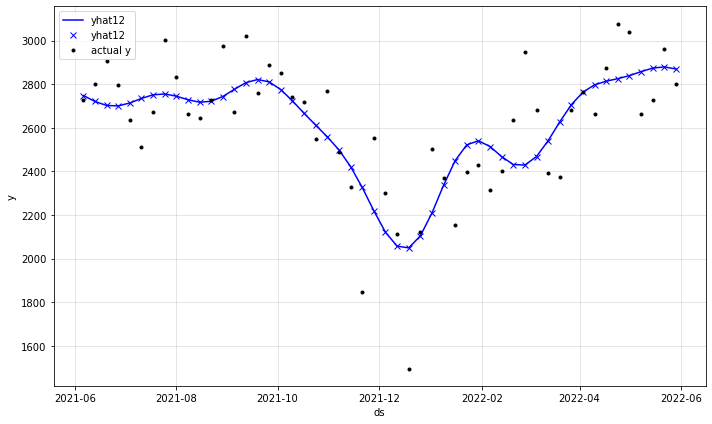

In [15]:
forecast = m.predict(df)
fig1 = m.plot(forecast[-52:])

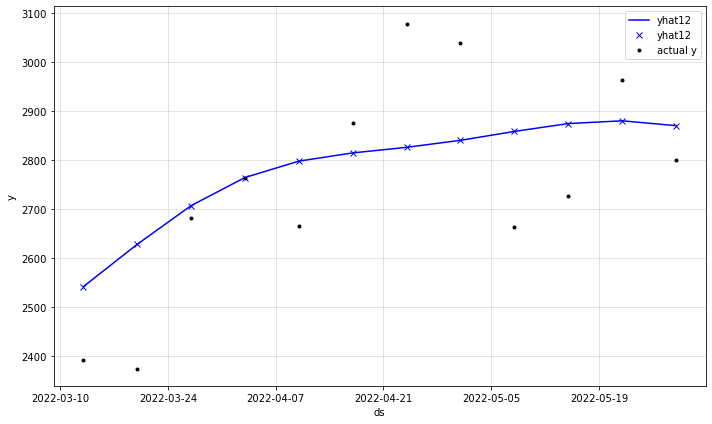

In [16]:
fig2 = m.plot(forecast[-12:])

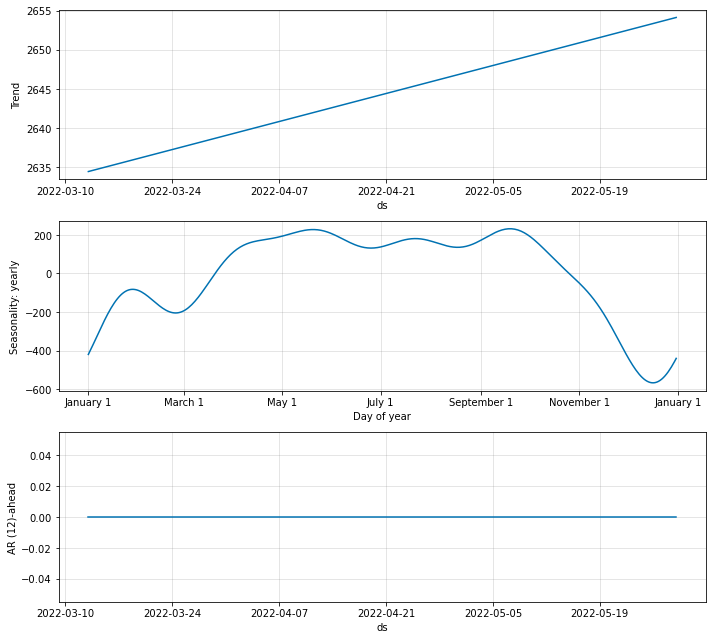

In [17]:
comp = m.plot_components(forecast[-12:])

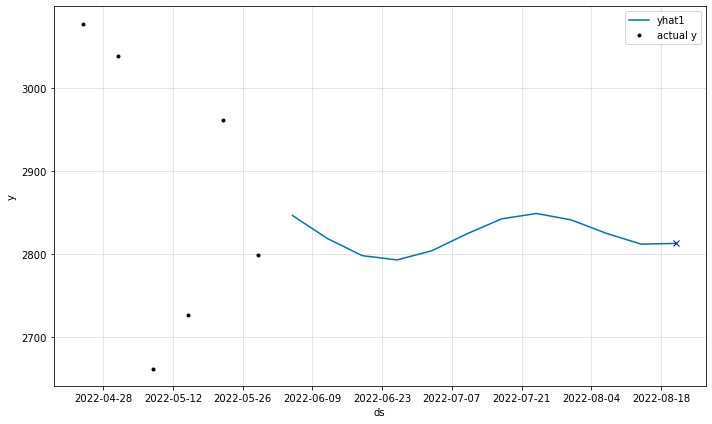

In [18]:
future = m.make_future_dataframe(df, periods=52)
forecast = m.predict(future)
fig = m.plot(forecast)